In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import export_graphviz
from IPython.display import Image   
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,149.0,5.843624,0.830851,4.3,5.1,5.8,6.4,7.9
sepal_width,149.0,3.059732,0.436342,2.0,2.8,3.0,3.3,4.4
petal_length,149.0,3.748993,1.767791,1.0,1.6,4.3,5.1,6.9
petal_width,149.0,1.194631,0.762622,0.1,0.3,1.3,1.8,2.5


In [10]:
for col in df.columns:
    print(df[col].unique())

[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
['setosa' 'versicolor' 'virginica']


In [12]:
cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

print(cat_col)
print(num_col)

Index(['species'], dtype='object')
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


sepal_length


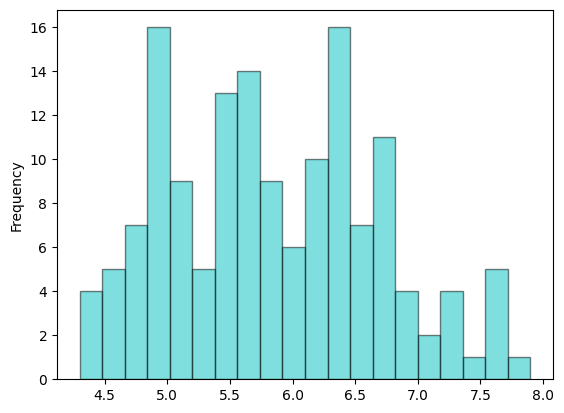

sepal_width


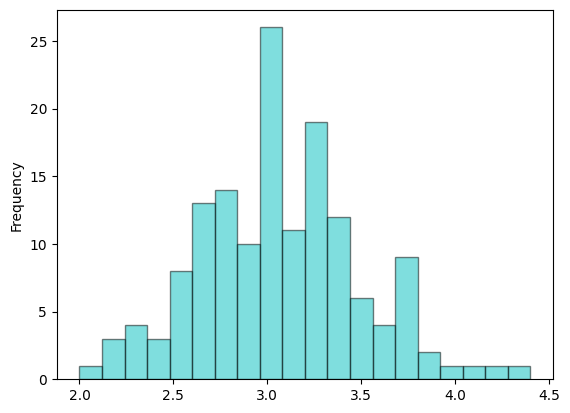

petal_length


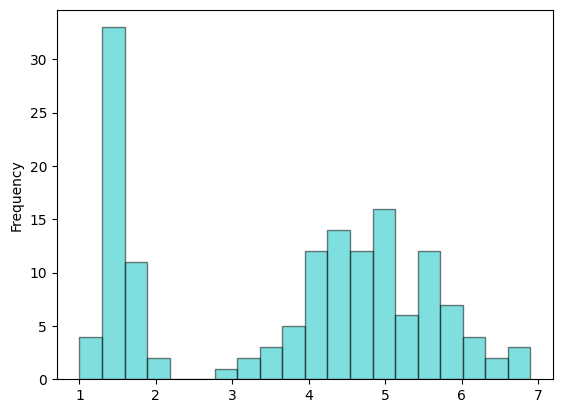

petal_width


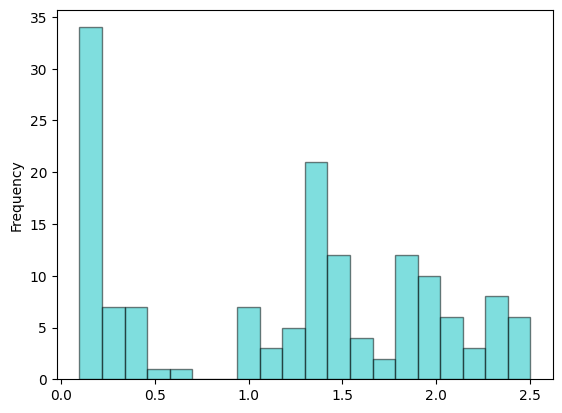

In [18]:
for col in num_col:
    print(col)
    plt.subplot(1,1,1)
    df[col].plot(kind='hist', color='c', alpha = 0.5, bins=20,edgecolor='black')
    plt.ylabel('Frequency')
    plt.show()

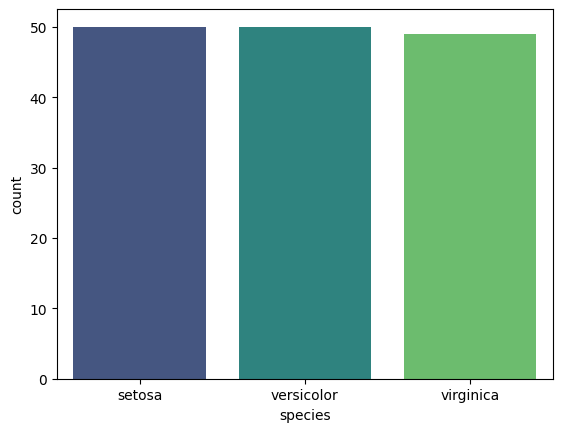

In [19]:
sns.countplot(x='species', data=df, palette='viridis')
plt.show()

In [20]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_classifier

RandomForestClassifier()

In [24]:
rf_classifier.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1570955272),
 DecisionTreeClassifier(max_features='sqrt', random_state=37994874),
 DecisionTreeClassifier(max_features='sqrt', random_state=1780001147),
 DecisionTreeClassifier(max_features='sqrt', random_state=889103589),
 DecisionTreeClassifier(max_features='sqrt', random_state=933567434),
 DecisionTreeClassifier(max_features='sqrt', random_state=1590212592),
 DecisionTreeClassifier(max_features='sqrt', random_state=1110620057),
 DecisionTreeClassifier(max_features='sqrt', random_state=470295259),
 DecisionTreeClassifier(max_features='sqrt', random_state=821592414),
 DecisionTreeClassifier(max_features='sqrt', random_state=2139122950),
 DecisionTreeClassifier(max_features='sqrt', random_state=1798637970),
 DecisionTreeClassifier(max_features='sqrt', random_state=1538614021),
 DecisionTreeClassifier(max_features='sqrt', random_state=650462952),
 DecisionTreeClassifier(max_features='sqrt', random_state=1051956831),
 DecisionTree

In [23]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


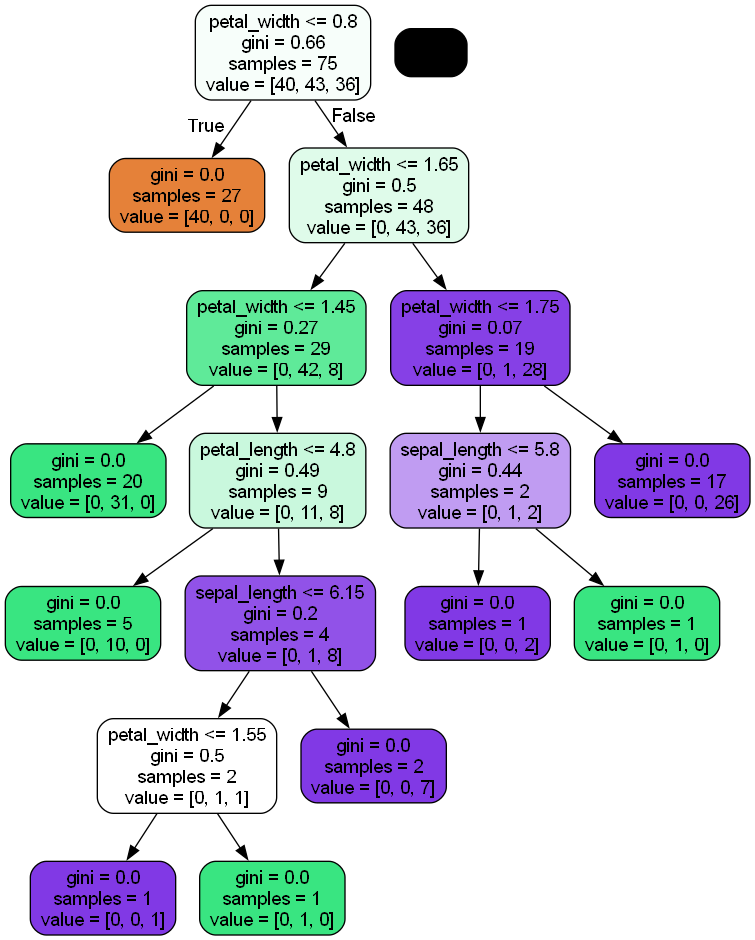

In [26]:
estimator = rf_classifier.estimators_[1]

dot_data = export_graphviz(estimator, out_file=None, 
                           feature_names=X_train.columns,  
                           rounded=True, proportion=False, 
                           precision=2, filled=True)

# Convert DOT data to a graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Display the graph
Image(graph.create_png())

In [28]:
y_pred = rf_classifier.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("accuracy:", accuracy*100)
print("classification_report:", classification_rep)


accuracy: 100.0
classification_report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [30]:
new_data = [[5.1, 3.5, 1.4, 0.2]]
y_pred_new = rf_classifier.predict(new_data)
y_pred_new[0]

'setosa'